# Analysis SPEC data in Python

## Wenjie Chen
### Date: May 17th, 2018

## Introduction

SPEC is a software that widely used in X-ray scattering experiments all around the world. However, it's hard to find a program or a tool to read the data which is produced from SPEC.

According to my research on the internet, a python module called __[pyspec](https://pythonhosted.org/pyspec/spec.html)__ was created by Stuart Wilkins about 10 years ago. Unfortunately I wasn't able to install it on my computer. I guess the problem is caused by the python version.

Nevertheless, I created this project to fulfill this goal --- to read and analysis SPEC data in Python.

## Functions

Several functions are defined to read and analysis SPEC data.

``` python
    spec_scan_reader(FILEPATH, FILENAME, scan_num) # Read SPEC data from a single data file with specific scan #.
    spec_data_reader(FILEPATH, FILENAME, scan_nums) # Read SPEC data from mutiple data files with specific scan #s.
    spec_plot(datablock, DETECTOR, data_legends, LEGEND_PREFIX, LEGEND_SUFFIX) # Plot a set of processed SPEC data together with legends.
    spec_data_average(FILEPATH, FILENAME, scan_nums) # Read several SPEC scans' data and average them.
    spec_data_bg_subtracted_scans(FILEPATH, FILENAME, signal_scan_nums, bg_scan_nums) # Subtract background from signals using SPEC data scan #s. 
    spec_data_bg_subtracted(signal_data, bg_data) # Subtract background from signals using readed/calculated SPEC data.
```

Notes: datablock is such a data format

``` python
    datablock = [data, data, data, ...]
```

## Source Code below:

In [249]:
def spec_scan_reader(FILEPATH, FILENAME, scan_num):
    
    '''
        Read SPEC data from a single data file with specific scan #. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            scan_num : [int] to specific the scan number.
            
        returns:
            [th, I0_BD3, TEY, MCP, pm3] : [list]
            
        example:
            [th, I0_BD3, TEY, MCP, pm3] = spec_scan_reader("./data/", "Sample_A", 56)
    ''' 
    
    import numpy as np
    
    PATH = FILEPATH + FILENAME + "_" + str(scan_num).zfill(3) + ".dat"
    data_origin = np.loadtxt(PATH)
    data = np.transpose(data_origin)
    th = data[0]
    I0_BD3 = data[6]
    TEY = data[7]
    MCP = data[8]
    pm3 = data[12]
    
    return [th, I0_BD3, TEY, MCP, pm3]

In [246]:
def spec_Escan_reader(FILEPATH, FILENAME, scan_num):
    
    '''
        Read SPEC Escan data from a single data file with specific scan #. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            scan_num : [int] to specific the scan number.
            
        returns:
            [E, I0_BD3, TEY, MCP, pm3] : [list]
            
        example:
            [E, I0_BD3, TEY, MCP, pm3] = spec_Escan_reader("./data/", "Sample_A", 56)
    ''' 
    
    import numpy as np
    
    PATH = FILEPATH + FILENAME + "_" + str(scan_num).zfill(3) + ".dat"
    data_origin = np.loadtxt(PATH)
    data = np.transpose(data_origin)
    E = data[0]
    I0_BD3 = data[5]
    TEY = data[6]
    MCP = data[7]
    pm3 = data[11]
    
    return [E, I0_BD3, TEY, MCP, pm3]

In [312]:
def spec_th2th_reader(FILEPATH, FILENAME, scan_num):
    
    '''
        Read SPEC Escan data from a single data file with specific scan #. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            scan_num : [int] to specific the scan number.
            
        returns:
            [tth, th, I0_BD3, TEY, MCP, pm3] : [list]
            
        example:
            [tth, th, I0_BD3, TEY, MCP, pm3] = spec_th2th_reader("./data/", "Sample_A", 56)
    ''' 
    
    import numpy as np
    
    PATH = FILEPATH + FILENAME + "_" + str(scan_num).zfill(3) + ".dat"
    data_origin = np.loadtxt(PATH)
    data = np.transpose(data_origin)
    tth = data[0]
    th = data[1]
    I0_BD3 = data[7]
    TEY = data[8]
    MCP = data[9]
    pm3 = data[13]
    
    return [tth, th, I0_BD3, TEY, MCP, pm3]

In [307]:
def spec_data_reader(SCAN_FORMAT, FILEPATH, FILENAME, scan_nums):
    
    '''
        Read SPEC data from mutiple data files with specific scan #s. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            SCAN_FORMAT : [string] to indicate the scan format, "ascan" or "a2scan".
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            scan_nums : [list] to specific the scan numbers.
            
        returns:
            [th, I0_BD3, TEY, MCP, pm3] or [tth, th, I0_BD3, TEY, MCP, pm3] : [list]
            
        example:
            datablock = spec_data_reader("./data/", "Sample_A", [100, 101, 102])
    ''' 
    
    import numpy as np
    
    data = []
    
    if SCAN_FORMAT == "ascan":
        for scan_num in scan_nums:
            data.append(spec_scan_reader(FILEPATH, FILENAME, scan_num))
    elif SCAN_FORMAT == "a2scan":
        for scan_num in scan_nums:
            data.append(spec_th2th_reader(FILEPATH, FILENAME, scan_num))
    else:
        raise ValueError('SCAN_FORMAT must be "ascan" or "a2scan"!')
    return data

In [420]:
def spec_plot(datablock, SCAN_FORMAT, VARIABLE, DETECTOR, I0_BD3, data_legends, LEGEND_PREFIX, LEGEND_SUFFIX, TITLE):
    
    '''
        Plot a set of processed SPEC data together with legends. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            datablock : [list] data read from SPEC data file with function "spec_data_reader".
            SCAN_FORMAT : [string] indicate the scan format, "ascan" or "a2scan".
            VARIABLE : [string] indicate the VARIABLE, "th" or "tth".
            DETECTOR : [string] must be chosen from "TEY", "MCP", "pm3".
            I0_BD3 : [int] 0 - do not divided by I0_BD3, 1 - divided by I0_BD3.
            data_legends : [list] a set of legends, [20, 40, 60], e.g.
            LEGEND_PREFIX : [string] prefix to data_legends.
            LEGEND_SUFFIX : [string] suffix to data_legends.
            TITLE : [string] figure title.
            
        returns:
            a figure with multiple curves marked with legends
            
        example:
            spec_plot(datablock, "a2scan", "tth", "MCP", 1, [100, 101, 102], "scan #", "")
            spec_plot(datablock, "ascan", "th", "MCP", 0, [20, 50, 80], "T = ", " K")
    ''' 
    import matplotlib.pyplot as plt
    
    plt.figure()
    
    if SCAN_FORMAT == "ascan":
        
        if DETECTOR == "TEY":
            det = 2
        elif DETECTOR == "MCP":
            det = 3
        elif DETECTOR == "pm3":
            det = 4
        else:
            raise ValueError('DETECTOR must be "TEY", "MCP" or "pm3"!')
            
        if I0_BD3 == 0:
            i = 0
            for legend in data_legends:
                plt.plot(datablock[i][0], datablock[i][det], label = LEGEND_PREFIX + str(legend) + LEGEND_SUFFIX)
                i = i + 1
        elif I0_BD3 == 1:
            i = 0
            for legend in data_legends:
                plt.plot(datablock[i][0], datablock[i][det]/datablock[i][1], label = LEGEND_PREFIX + str(legend) + LEGEND_SUFFIX)
                i = i + 1
        else:
            raise ValueError('IO_BD3 must be 0 or 1!')
    
    elif SCAN_FORMAT == "a2scan":
        
        if DETECTOR == "TEY":
            det = 3
        elif DETECTOR == "MCP":
            det = 4
        elif DETECTOR == "pm3":
            det = 5
        else:
            raise ValueError('DETECTOR must be "TEY", "MCP" or "pm3"!')
        
        if VARIABLE == "th":
            if I0_BD3 == 0:
                i = 0
                for legend in data_legends:
                    plt.plot(datablock[i][1], datablock[i][det], label = LEGEND_PREFIX + str(legend) + LEGEND_SUFFIX)
                    i = i + 1
            elif I0_BD3 == 1:
                i = 0
                for legend in data_legends:
                    plt.plot(datablock[i][1], datablock[i][det]/datablock[i][2], label = LEGEND_PREFIX + str(legend) + LEGEND_SUFFIX)
                    i = i + 1
            else:
                raise ValueError('IO_BD3 must be 0 or 1!')
        elif VARIABLE == "tth":
            if I0_BD3 == 0:
                i = 0
                for legend in data_legends:
                    plt.plot(datablock[i][0], datablock[i][det], label = LEGEND_PREFIX + str(legend) + LEGEND_SUFFIX)
                    i = i + 1
            elif I0_BD3 == 1:
                i = 0
                for legend in data_legends:
                    plt.plot(datablock[i][0], datablock[i][det]/datablock[i][2], label = LEGEND_PREFIX + str(legend) + LEGEND_SUFFIX)
                    i = i + 1
            else:
                raise ValueError('IO_BD3 must be 0 or 1!')
        else:
            raise ValueError('In a2scan VARIABLE must be "th" or "tth"!')
    plt.xlabel(VARIABLE)
    plt.ylabel(DETECTOR)
    plt.legend()
    plt.title(TITLE)
    plt.show()
    return

In [426]:
def spec_scatter3_th2th(datablock, DETECTOR, I0_BD3, scan_nums, TITLE):
    '''
        Scatter 3D-data: (th, tth, counts). 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            datablock : [[tth, th, I0_BD3, TEY, MCP, pm3], ...] data read from SPEC data file with function "spec_data_reader".
            DETECTOR : [string] must be chosen from "TEY", "MCP", "pm3".
            I0_BD3 : [int] 0 - do not divided by I0_BD3, 1 - divided by I0_BD3.
            scan_nums : [list] to specific the scan numbers.
            TITLE : [string] figure title
            
        returns:
            a 3D figure with lots of dots
            
        example:
            spec_plot(datablock, "a2scan", "tth", "MCP", 1, [100, 101, 102], "scan #", "")
            spec_plot(datablock, "ascan", "th", "MCP", 0, [20, 50, 80], "T = ", " K")
    ''' 
    
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    if DETECTOR == "TEY":
        det = 3
    elif DETECTOR == "MCP":
        det = 4
    elif DETECTOR == "pm3":
        det = 5
    else:
        raise ValueError('DETECTOR must be "TEY", "MCP" or "pm3"!')
            
    if I0_BD3 == 0:
        i = 0
        for scan_num in scan_nums:
            ax.scatter(datablock[i][0], datablock[i][1], datablock[i][det], s=20, c=None, depthshade=True)
            i = i + 1
    elif I0_BD3 == 1:
        i = 0
        for scan_num in scan_nums:
            ax.scatter(datablock[i][0], datablock[i][1], datablock[i][det]/datablock[i][2], s=20, c=None, depthshade=True)
            i = i + 1
    else:
        raise ValueError('IO_BD3 must be 0 or 1!')
    ax.set_xlabel('tth')
    ax.set_ylabel('th')
    ax.set_zlabel(DETECTOR)
    plt.title(TITLE)
    plt.show()
    return

In [ ]:
'''
def spec_wireframe_th2th(datablock, DETECTOR, I0_BD3, scan_nums):
    
        Scatter 3D-data: (th, tth, counts). 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            datablock : [[tth, th, I0_BD3, TEY, MCP, pm3], ...] data read from SPEC data file with function "spec_data_reader".
            DETECTOR : [string] must be chosen from "TEY", "MCP", "pm3".
            I0_BD3 : [int] 0 - do not divided by I0_BD3, 1 - divided by I0_BD3.
            scan_nums : [list] to specific the scan numbers.
            
        returns:
            a 3D figure with lots of dots
            
        example:
            spec_plot(datablock, "a2scan", "tth", "MCP", 1, [100, 101, 102], "scan #", "")
            spec_plot(datablock, "ascan", "th", "MCP", 0, [20, 50, 80], "T = ", " K")
    
    
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    if DETECTOR == "TEY":
        det = 3
    elif DETECTOR == "MCP":
        det = 4
    elif DETECTOR == "pm3":
        det = 5
    else:
        raise ValueError('DETECTOR must be "TEY", "MCP" or "pm3"!')
            
    if I0_BD3 == 0:
        i = 0
        for scan_num in scan_nums:
            ax.scatter(datablock[i][0], datablock[i][1], datablock[i][det], s=20, c=None, depthshade=True)
            i = i + 1
    elif I0_BD3 == 1:
        i = 0
        for scan_num in scan_nums:
            ax.scatter(datablock[i][0], datablock[i][1], datablock[i][det]/datablock[i][2], s=20, c=None, depthshade=True)
            i = i + 1
    else:
        raise ValueError('IO_BD3 must be 0 or 1!')
    ax.set_xlabel('tth')
    ax.set_ylabel('th')
    ax.set_zlabel(DETECTOR)
    plt.show()
'''

In [425]:
def spec_data_average_f(FILEPATH, FILENAME, scan_nums):
    
    '''
        Read several SPEC scans' data and average them. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            scan_nums : [list] to specific the scan numbers.
            
        returns:
            [th, IO_BD3, TEY, MCP, pm3] : [list]
            
        example:
            [th, IO_BD3, TEY, MCP, pm3] = spec_data_average("./data/", "Sample_A", [100, 101, 102])
    ''' 
    
    import numpy as np
    
    data = []
    
    for scan_num in scan_nums:
        data.append(spec_scan_reader(FILEPATH, FILENAME, scan_num))
    
    th = data[0][0]
    I0_BD3 = data[0][1]
    TEY = data[0][2] / data[0][1]
    MCP = data[0][3] / data[0][1]
    pm3 = data[0][4] / data[0][1]
    
    i = 1
    scan_nums_minus = scan_nums[:-1]
    for scan_num in scan_nums_minus:
        TEY = TEY + data[i][2] / data[i][1]
        MCP = MCP + data[i][3] / data[i][1]
        pm3 = pm3 + data[i][4] / data[i][1]
        i = i + 1
        
    TEY = TEY / i
    MCP = MCP / i
    pm3 = pm3 / i
    
    return [th, I0_BD3, TEY, MCP, pm3]

In [436]:
def spec_data_average(datablock, SCAN_FORMAT):
    
    '''
        Read several SPEC scans' data and average them. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            datablock : [list] data read from SPEC data file with function "spec_data_reader".
            SCAN_FORMAT : [string] to indicate the scan format, "ascan" or "a2scan".
            
        returns:
            [th, IO_BD3, TEY, MCP, pm3] or  [tth, th, IO_BD3, TEY, MCP, pm3]: [list]
            
        example:
            [th, IO_BD3, TEY, MCP, pm3] = spec_data_average(datablock1, "ascan")
            [tth, th, IO_BD3, TEY, MCP, pm3] = spec_data_average(datablock2, "a2scan")
    ''' 
    
    import numpy as np
    
    if SCAN_FORMAT == 'ascan':
        th = datablock[0][0]
        I0_BD3 = datablock[0][1]
        TEY = datablock[0][2] - datablock[0][2]
        MCP = datablock[0][3] - datablock[0][3]
        pm3 = datablock[0][4] - datablock[0][4]
        
        i = 0
        for data in datablock:
            TEY = TEY + data[2] / data[1]
            MCP = MCP + data[3] / data[1]
            pm3 = pm3 + data[4] / data[1]
            i = i + 1

        TEY = TEY / i
        MCP = MCP / i
        pm3 = pm3 / i
        
        return [th, I0_BD3, TEY, MCP, pm3]
    
    elif SCAN_FORMAT == 'a2scan':
        tth = datablock[0][0]
        th = datablock[0][1]
        I0_BD3 = datablock[0][2]
        TEY = datablock[0][3] - datablock[0][3]
        MCP = datablock[0][4] - datablock[0][4]
        pm3 = datablock[0][5] - datablock[0][5]
        
        i = 0
        for data in datablock:
            TEY = TEY + data[3] / data[2]
            MCP = MCP + data[4] / data[2]
            pm3 = pm3 + data[5] / data[2]
            i = i + 1

        TEY = TEY / i
        MCP = MCP / i
        pm3 = pm3 / i
        
        return [tth, th, I0_BD3, TEY, MCP, pm3]
    
    else:
        raise ValueError('SCAN_FORMAT must be "ascan" or "a2scan"!')
        return

In [302]:
def spec_data_bg_subtracted_scans(FILEPATH, FILENAME, signal_scan_nums, bg_scan_nums):
    
    '''
        Subtract background from signals using SPEC data scan #s. 
        
        Author: Wenjie Chen
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            signal_scan_nums : [list] to specific the scan numbers of signals.
            bg_scan_nums : [list] to specific the scan numbers of the background.
            
        returns:
            [th, TEY, MCP, pm3] : [list]
            
        example:
            [th, TEY, MCP, pm3] = spec_data_bg_subtracted_scans("./data/", "Sample_A", [100, 101, 102], [200, 201, 202])
    '''
    
    [th_sig, I0_BD3_sig, TEY_sig, MCP_sig, pm3_sig] = spec_data_average(FILEPATH, FILENAME, signal_scan_nums)
    [th_bg, I0_BD3_bg, TEY_bg, MCP_bg, pm3_bg] = spec_data_average(FILEPATH, FILENAME, bg_scan_nums)
    TEY = TEY_sig - TEY_bg
    MCP = MCP_sig - MCP_bg
    pm3 = pm3_sig - pm3_bg
    
    return [th_sig, I0_BD3_sig, TEY, MCP, pm3]

In [303]:
def spec_data_bg_subtracted(signal_data, bg_data):
    
    '''
        Subtract background from signals using readed/calculated SPEC data. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            signal_data : [list] = [th, TEY, MCP, pm3]
            bg_data : [list] = [th, TEY, MCP, pm3]
            
        returns:
            [th, I0_BD3, TEY, MCP, pm3] : [list]
            
        example:
            [th, I0_BD3, TEY, MCP, pm3] = spec_data_bg_subtracted(signal_data, bg_data)
    ''' 
    
    TEY = signal_data[2] - bg_data[2]
    MCP = signal_data[3] - bg_data[3]
    pm3 = signal_data[4] - bg_data[4]
    
    return [signal_data[0], signal_data[1], TEY, MCP, pm3]

In [424]:
def spec_show_a2scan_route(FILEPATH, FILENAME, scan_nums, line_color):
    '''
        Draw th2th scan route. 
        
        Author: Wenjie Chen 
        E-mail: wenjiechen@pku.edu.cn
        
        args:
            FILEPATH : [string] to indicate where the data file is located.
            FILENAME : [string] to specific the data file name.
            scan_nums : [list] to specific the scan numbers.
            line_color : [tupple] to define the line color (RGB), for example (0.1,0.5,0.1).
            
        returns:
            Serveral lines in current canvas.
            
        example:
            plt.figure()
            spec_show_a2scan_route("./data/", "sample_a", [123, 124, 125], (0.1,0.5,0.1))
            plt.show()
    '''
    
    import matplotlib.pyplot as plt
    for scan_num in scan_nums:
        data = spec_th2th_reader(FILEPATH, FILENAME, scan_num)
        tth = [data[0][0], data[0][-1]]
        th = [data[1][0], data[1][-1]]
        plt.plot(th, tth, c=line_color)
    return

Below is the test zone.

In [164]:
[th, TEY, MCP, pm3] = spec_scan_reader("./data/", "E6_Bare", 151)

In [165]:
import matplotlib.pyplot as plt

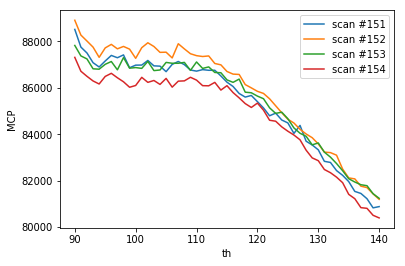

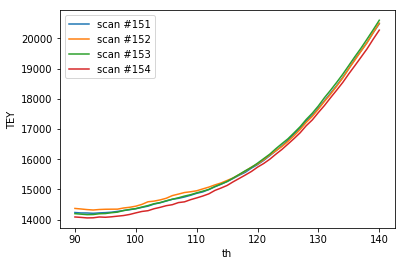

In [166]:
scan_nums = [151, 152, 153, 154]
datablock = spec_data_reader("./data/", "E6_Bare", scan_nums)
spec_plot(datablock, "MCP", scan_nums, "scan #", "")
spec_plot(datablock, "TEY", scan_nums, "scan #", "")

In [167]:
a = "test"
b = "test"
a == b

True

In [170]:
a = [1, 2, 3]
b = [4, 5, 6]
c= [np.array(a), np.array(b)]

In [172]:
sum(c)

array([5, 7, 9])

In [300]:
[th, IO_BD3, TEY, MCP, pm3] = spec_data_average("./data/PKU/Cu_1_data/", "Cu_1", [18,19])

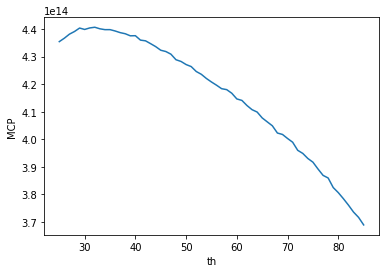

In [301]:
plt.plot(th, MCP)
plt.xlabel('th')
plt.ylabel('MCP')
plt.show()

In [175]:
[th, TEY, MCP, pm3] = spec_data_bg_subtracted_scans("./data/", "E6_Bare", [151, 152], [153, 154])

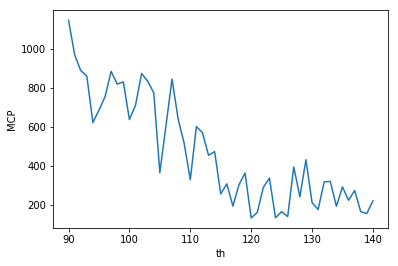

In [176]:
plt.plot(th, MCP)
plt.xlabel('th')
plt.ylabel('MCP')
plt.show()

In [304]:
signal_data = spec_data_average("./data/PKU/Cu_1_data/", "Cu_1", [17, 18])
bg_data = spec_data_average("./data/PKU/Cu_1_data/", "Cu_1", [18, 19])
[th, I0_BD3, TEY, MCP, pm3] = spec_data_bg_subtracted(signal_data, bg_data)

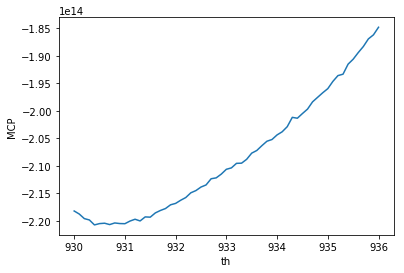

In [305]:
plt.plot(th, MCP)
plt.xlabel('th')
plt.ylabel('MCP')
plt.show()

In [188]:
db1 = spec_scan_reader("./data/", "E6_Bare", 151)
db2 = spec_scan_reader("./data/", "E6_Bare", 152)

In [197]:
db = [db1, db2]

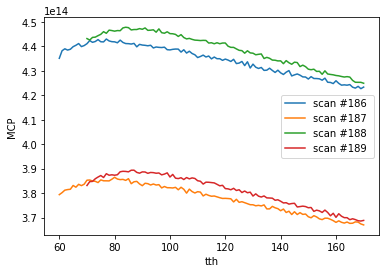

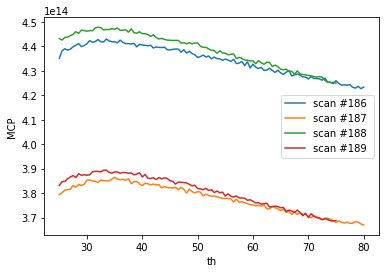

In [338]:
scan_nums = [140, 141, 142]
scan_nums = [186, 187, 188, 189]
datablock = spec_data_reader("a2scan", "./data/PKU/Cu_1_data/", "Cu_1", scan_nums)
spec_plot(datablock, "a2scan", "tth", "MCP", 1, scan_nums, "scan #", " ")
spec_plot(datablock, "a2scan", "th", "MCP", 1, scan_nums, "scan #", " ")

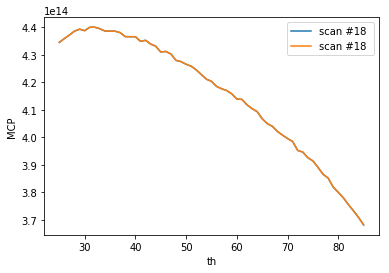

In [287]:
db = spec_scan_reader("./data/PKU/Cu_1_data/", "Cu_1", 18)
spec_plot([db], "th", "MCP", 1, [18], "scan #", " ")

In [213]:
Edata = spec_scan_reader("./data/PKU/Cu_1_data/", "Cu_1", 4)

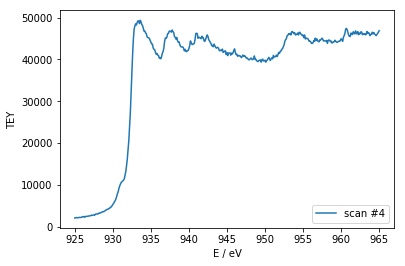

In [238]:
spec_plot([Edata], "E / eV", "TEY", [4], "scan #", "")

In [252]:
[th, I0_BD3, TEY, MCP, pm3] = spec_scan_reader("./data/PKU/Cu_1_data/", "Cu_1", 18)

In [253]:
TEY/I0_BD3

array([  2.29366401e+14,   2.16703964e+14,   2.05256642e+14,
         1.95871547e+14,   1.86337414e+14,   1.77640511e+14,
         1.70240880e+14,   1.63327658e+14,   1.57079690e+14,
         1.51676678e+14,   1.45259608e+14,   1.40231010e+14,
         1.35797111e+14,   1.31517016e+14,   1.27335763e+14,
         1.23463537e+14,   1.19900596e+14,   1.16650166e+14,
         1.13470598e+14,   1.10222180e+14,   1.07910552e+14,
         1.05672503e+14,   1.03124407e+14,   1.00745594e+14,
         9.81868888e+13,   9.60720709e+13,   9.35921718e+13,
         9.22122814e+13,   9.10771405e+13,   8.90246096e+13,
         8.73016865e+13,   8.59290164e+13,   8.41903290e+13,
         8.32884113e+13,   8.13618562e+13,   8.04556783e+13,
         7.90183427e+13,   7.77363135e+13,   7.61764635e+13,
         7.53024477e+13,   7.40987781e+13,   7.33236840e+13,
         7.27016307e+13,   7.24339846e+13,   7.17992578e+13,
         7.08926155e+13,   7.01411695e+13,   6.94880267e+13,
         6.90307076e+13,

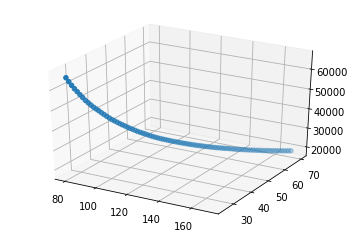

In [343]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = spec_th2th_reader("./data/PKU/Cu_1_data/", "Cu_1", 190)
ax.scatter(data[0], data[1], data[3], s=20, c=None, depthshade=True)
plt.show()

<IPython.core.display.Javascript object>


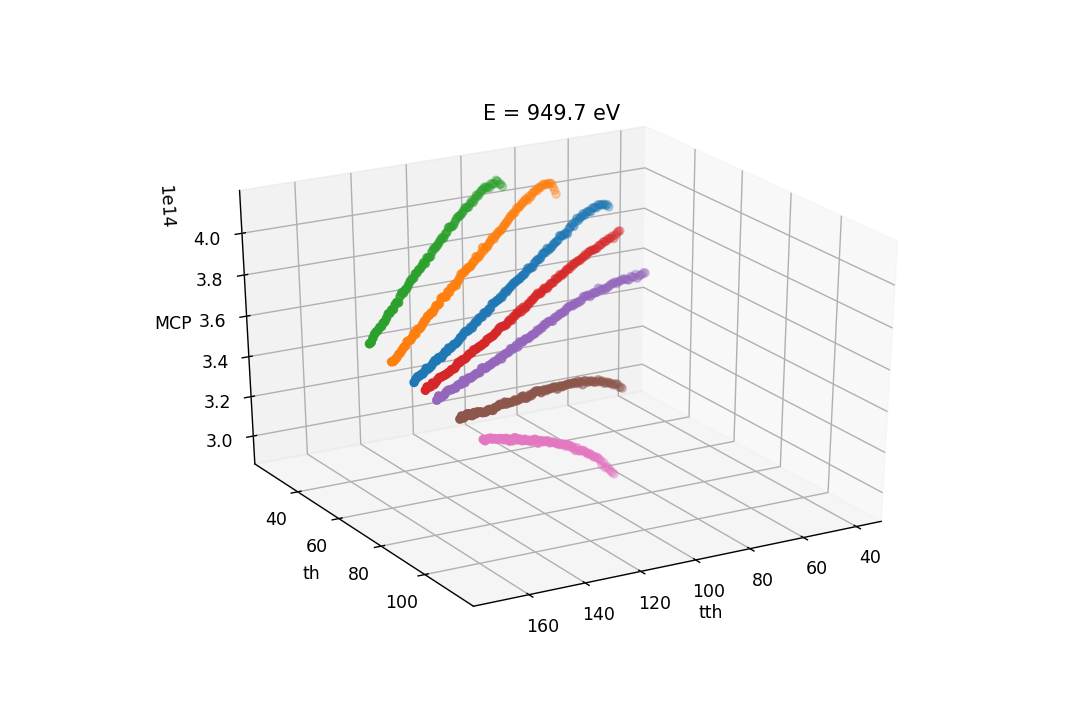

In [412]:
%matplotlib notebook
scan_nums = [242, 243, 244, 245, 246, 247, 248]
datablock = spec_data_reader("a2scan", "./data/PKU/Cu_1_data/", "Cu_1", scan_nums)
spec_scatter3_th2th(datablock, "MCP", 1, scan_nums, "E = 949.7 eV")

<IPython.core.display.Javascript object>


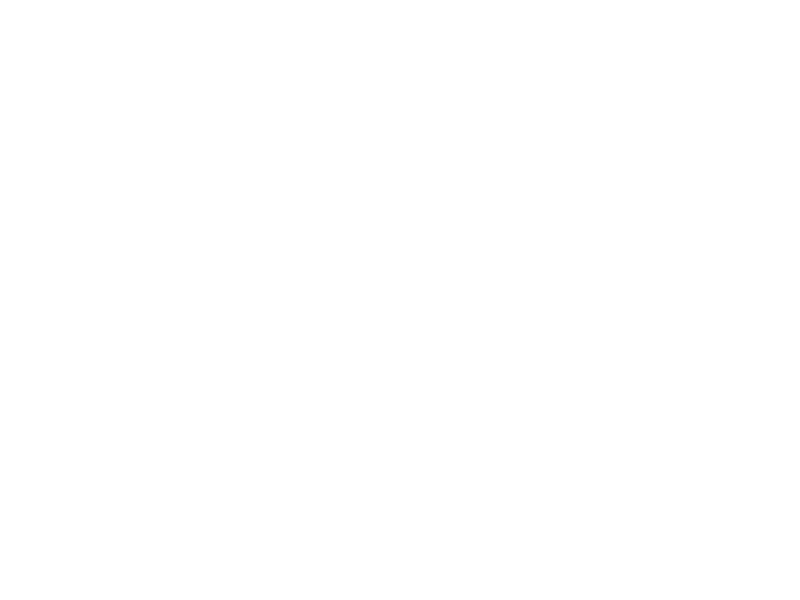

IndexError: index 140 is out of bounds for axis 0 with size 140

In [409]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
tth = np.linspace(40,179,140)
th = np.linspace(25,124.5,200)

TTH, TH = np.meshgrid(tth,th)

scan_nums = [242, 243, 244, 245, 246, 247, 248]

COUNTS = TTH - TTH

datablock = spec_data_reader("a2scan", "./data/PKU/Cu_1_data/", "Cu_1", scan_nums)


for data in datablock:
    j = 0
    for temp in data[0]:
        COUNTS[int(round(data[0][j],0) - 40)][int((round(data[1][j],1) - 25)*2)] = data[3][j]/data[2][j]
        #print(int(round(data[0][j],0) - 40), int((round(data[1][j],1) - 25)*2))
        #print(round(data[1][j],1))
        j = j + 1
    #ax.scatter(datablock[i][0], datablock[i][1], datablock[i][det]/datablock[i][2], s=20, c=None, depthshade=True)
ax.plot_wireframe(TTH, TH, COUNTS)
ax.set_xlabel('tth')
ax.set_ylabel('th')
ax.set_zlabel('MCP')
plt.show()

<IPython.core.display.Javascript object>


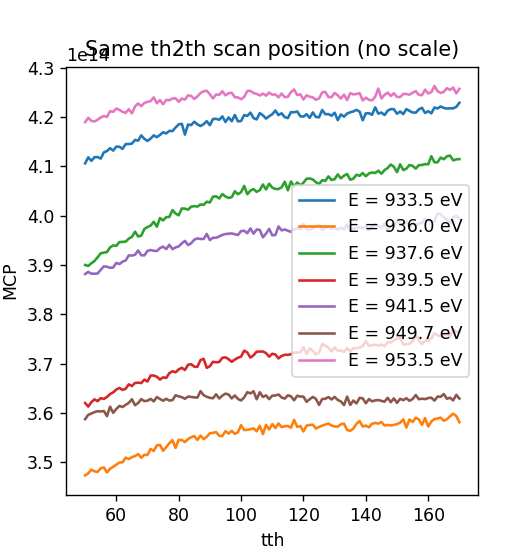

<IPython.core.display.Javascript object>


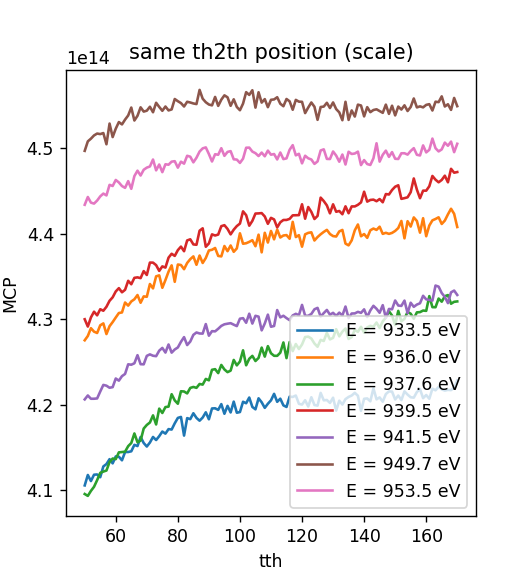

In [422]:

scan_nums = [231, 232, 233, 234, 228, 229, 230]
energy = [933.5, 936.0, 937.6, 939.5, 941.5, 949.7, 953.5]
energy_counts = [49587, 40286, 47216, 41745, 45757, 39556, 46852]

datablock = spec_data_reader("a2scan", "./data/PKU/Cu_1_data/", "Cu_1", scan_nums)

spec_plot(datablock, "a2scan", "tth", "MCP", 1, energy, "E = ", " eV", "Same th2th scan position (no scale)")

i = 0
for data in datablock:
    data[4] = data[4]/energy_counts[i]*energy_counts[0]
    i = i + 1

spec_plot(datablock, "a2scan", "tth", "MCP", 1, energy, "E = ", " eV", "same th2th position (scale)")

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])